In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/ufes/datasets/ISIC2024/train-metadata.csv')

/tmp/ipykernel_7548/561533406.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/ufes/datasets/ISIC2024/train-metadata.csv')


## Columns

In [3]:
df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

## Checking data imbalance

In [4]:
df['diagnosis'] = df['target'].map({0:'benign', 1:'malignant'}) 
df['diagnosis'].value_counts() / len(df['diagnosis']) * 100

diagnosis
benign       99.902009
malignant     0.097991
Name: count, dtype: float64

The dataset is heavy imbalanced, with less than 0.1% of the samples belonging to the malignant class.

## Feature distributions

### Approximate age of patient at time of imaging

<Axes: title={'center': 'Distribution of age_approx'}, xlabel='age_approx', ylabel='Probability'>

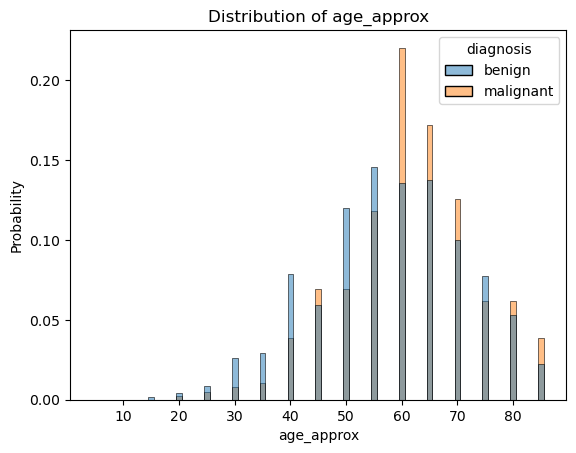

In [5]:
def plot_hist(feature, discrete=True, kde=False):
    ax = sns.histplot(df, x=feature, hue='diagnosis', stat='probability', common_norm=False, discrete=discrete, kde=kde)
    ax.set_title(f'Distribution of {feature}')   
    return ax

plot_hist('age_approx')

### Sex of the person

<Axes: title={'center': 'Distribution of sex'}, xlabel='sex', ylabel='Probability'>

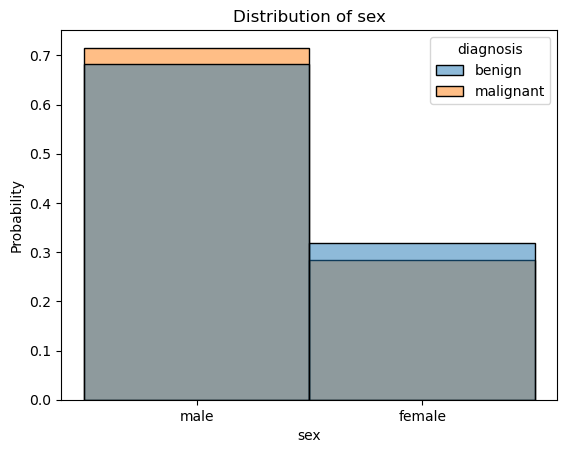

In [6]:
plot_hist('sex')

### Location of the lesion on the patient's body

<Axes: title={'center': 'Distribution of anatom_site_general'}, xlabel='anatom_site_general', ylabel='Probability'>

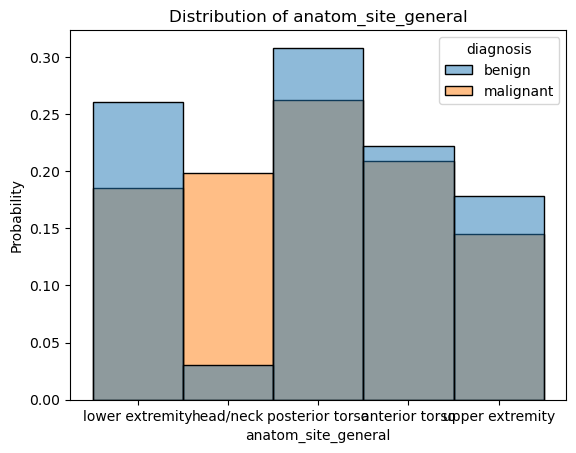

In [7]:
plot_hist('anatom_site_general')


### Maximum diameter of the lesion (mm)

<Axes: title={'center': 'Distribution of clin_size_long_diam_mm'}, xlabel='clin_size_long_diam_mm', ylabel='Probability'>

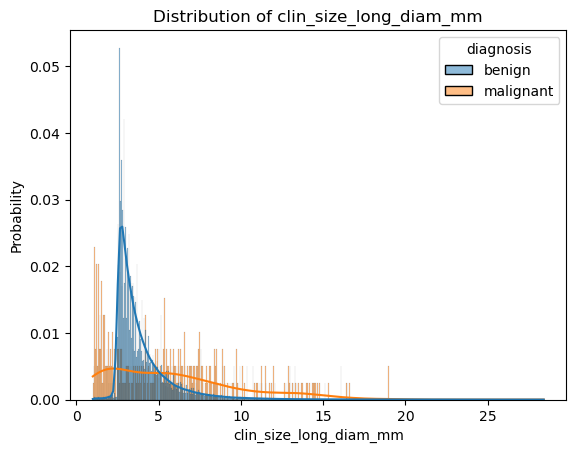

In [8]:
plot_hist('clin_size_long_diam_mm', False, True)


### 'A' inside lesion

<Axes: title={'center': 'Distribution of tbp_lv_A'}, xlabel='tbp_lv_A', ylabel='Probability'>

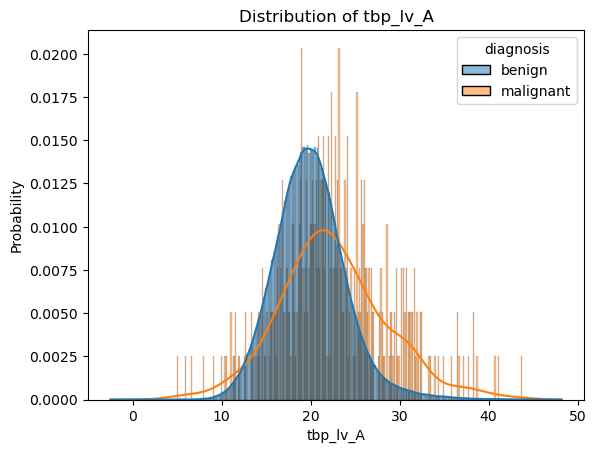

In [9]:
plot_hist('tbp_lv_A', False, True)

### 'B' inside lesion

<Axes: title={'center': 'Distribution of tbp_lv_B'}, xlabel='tbp_lv_B', ylabel='Probability'>

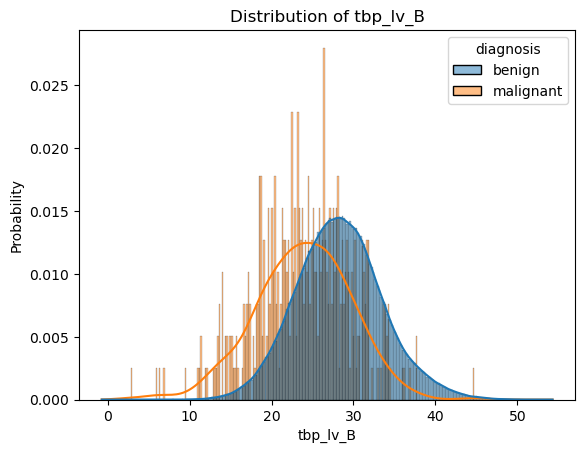

In [10]:
plot_hist('tbp_lv_B', False, True)

### A outside lesion

<Axes: title={'center': 'Distribution of tbp_lv_Aext'}, xlabel='tbp_lv_Aext', ylabel='Probability'>

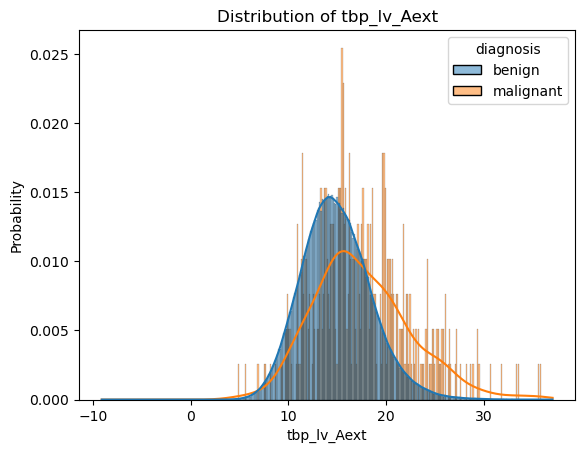

In [11]:
plot_hist('tbp_lv_Aext', False, True)

### B outside lesion

<Axes: title={'center': 'Distribution of tbp_lv_Bext'}, xlabel='tbp_lv_Bext', ylabel='Probability'>

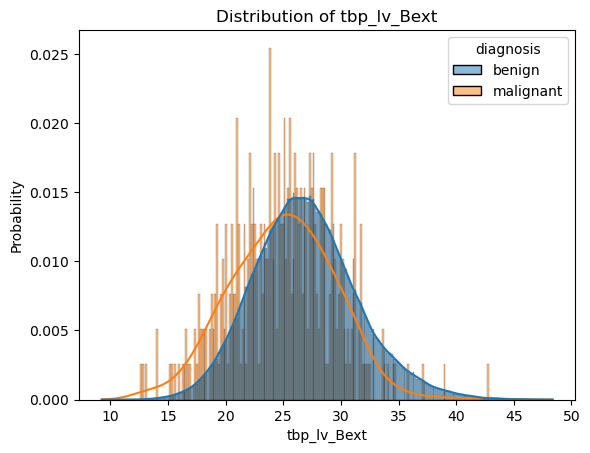

In [12]:
plot_hist('tbp_lv_Bext', False, True)


### Chroma inside lesion

<Axes: title={'center': 'Distribution of tbp_lv_C'}, xlabel='tbp_lv_C', ylabel='Probability'>

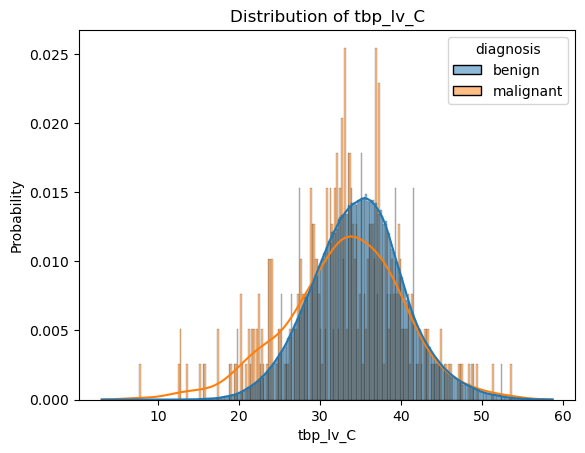

In [13]:
plot_hist('tbp_lv_C', False, True)

### Chroma outside lesion

<Axes: title={'center': 'Distribution of tbp_lv_Cext'}, xlabel='tbp_lv_Cext', ylabel='Probability'>

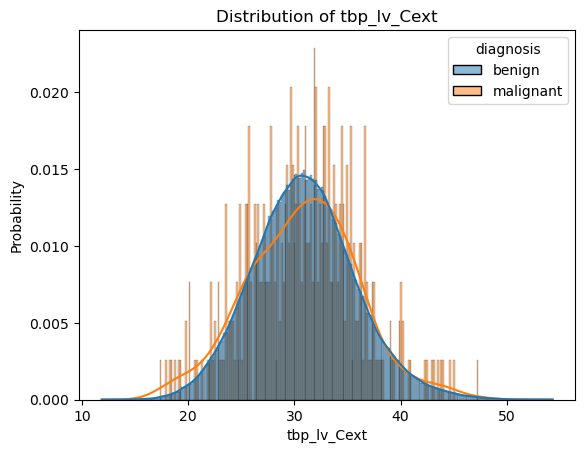

In [14]:
plot_hist('tbp_lv_Cext', False, True)

### Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown)

<Axes: title={'center': 'Distribution of tbp_lv_H'}, xlabel='tbp_lv_H', ylabel='Probability'>

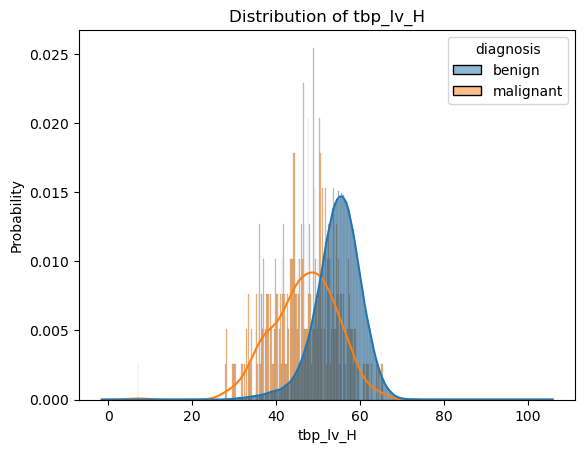

In [15]:
plot_hist('tbp_lv_H', False, True)

### Hue outside lesion

<Axes: title={'center': 'Distribution of tbp_lv_Hext'}, xlabel='tbp_lv_Hext', ylabel='Probability'>

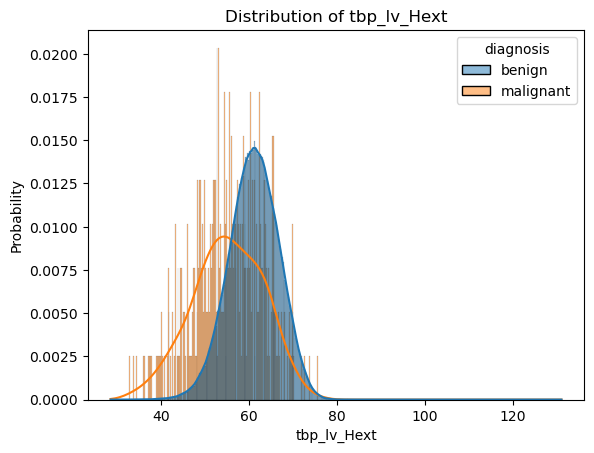

In [16]:
plot_hist('tbp_lv_Hext', False, True)

### L inside lesion

<Axes: title={'center': 'Distribution of tbp_lv_L'}, xlabel='tbp_lv_L', ylabel='Probability'>

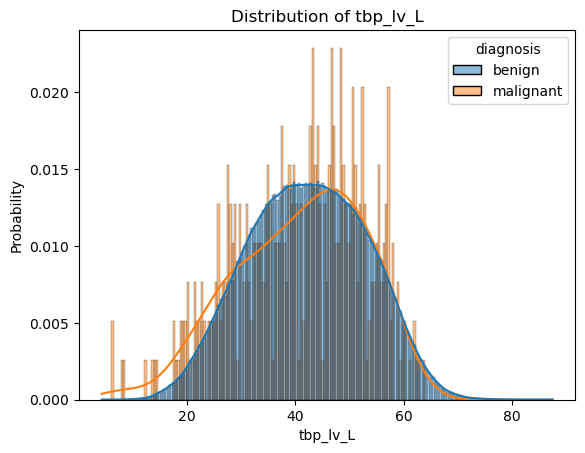

In [17]:
plot_hist('tbp_lv_L', False, True)

### L outside lesion

<Axes: title={'center': 'Distribution of tbp_lv_Lext'}, xlabel='tbp_lv_Lext', ylabel='Probability'>

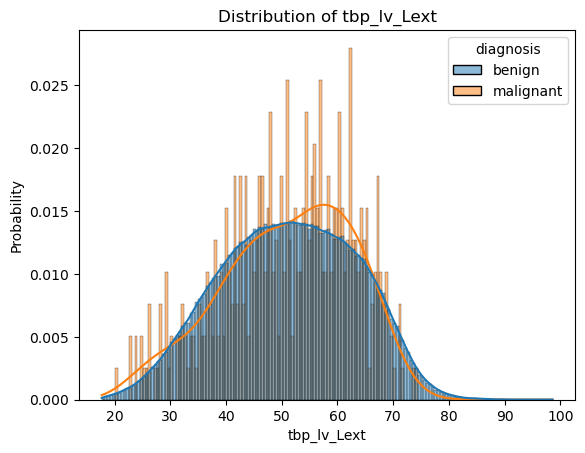

In [18]:
plot_hist('tbp_lv_Lext', False, True)

### Area of lesion (mm^2)

<Axes: title={'center': 'Distribution of tbp_lv_areaMM2'}, xlabel='tbp_lv_areaMM2', ylabel='Probability'>

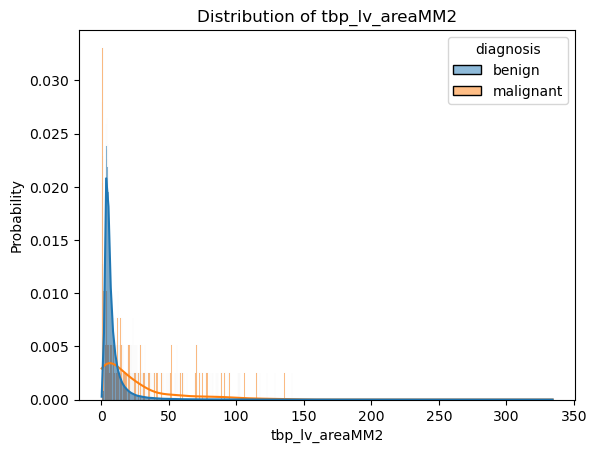

In [19]:
plot_hist('tbp_lv_areaMM2', False, True)

### Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10

<Axes: title={'center': 'Distribution of tbp_lv_area_perim_ratio'}, xlabel='tbp_lv_area_perim_ratio', ylabel='Probability'>

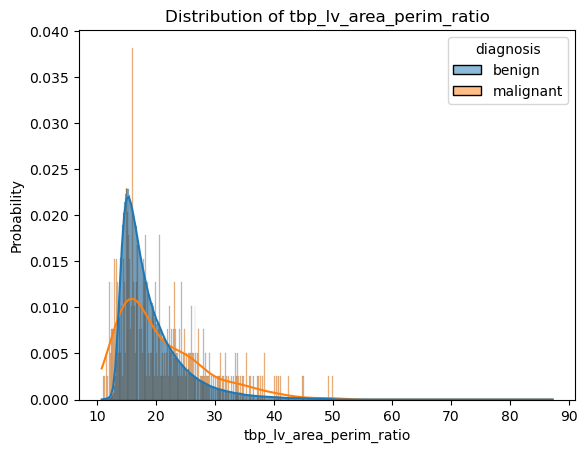

In [20]:
plot_hist('tbp_lv_area_perim_ratio', False, True)

### Color irregularity, calculated as the variance of colors within the lesion's boundary

<Axes: title={'center': 'Distribution of tbp_lv_color_std_mean'}, xlabel='tbp_lv_color_std_mean', ylabel='Probability'>

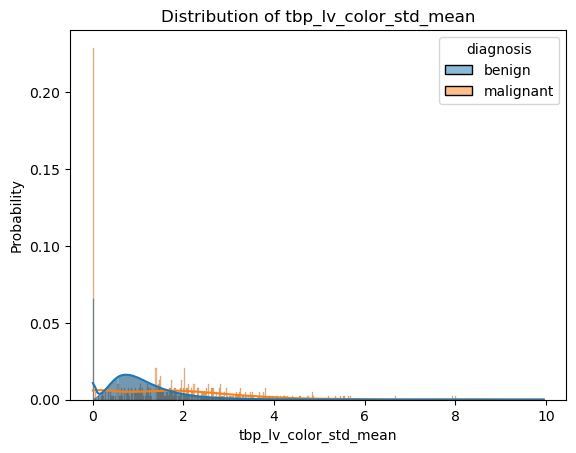

In [21]:
plot_hist('tbp_lv_color_std_mean', False, True)

### Average A contrast (inside vs. outside lesion)

In [ ]:
plot_hist('tbp_lv_deltaA', False, True)

### Average B contrast (inside vs. outside lesion)

<Axes: title={'center': 'Distribution of tbp_lv_deltaB'}, xlabel='tbp_lv_deltaB', ylabel='Probability'>

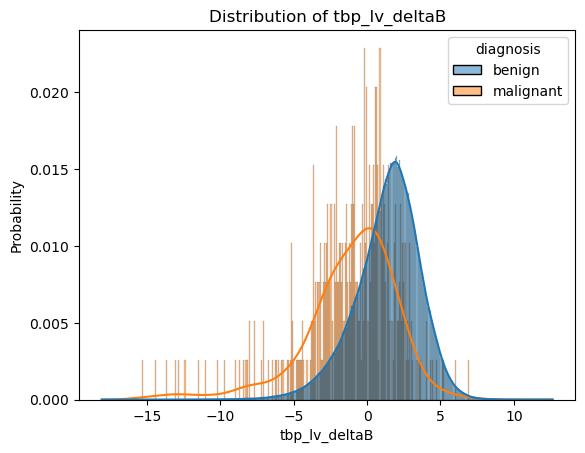

In [ ]:
plot_hist('tbp_lv_deltaB', False, True)

### Average L contrast (inside vs. outside lesion)

<Axes: title={'center': 'Distribution of tbp_lv_deltaL'}, xlabel='tbp_lv_deltaL', ylabel='Probability'>

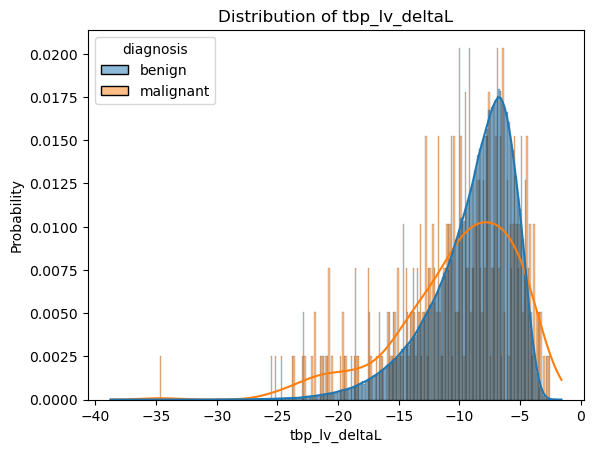

In [ ]:
plot_hist('tbp_lv_deltaL', False, True)

### Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25

<Axes: title={'center': 'Distribution of tbp_lv_deltaLBnorm'}, xlabel='tbp_lv_deltaLBnorm', ylabel='Probability'>

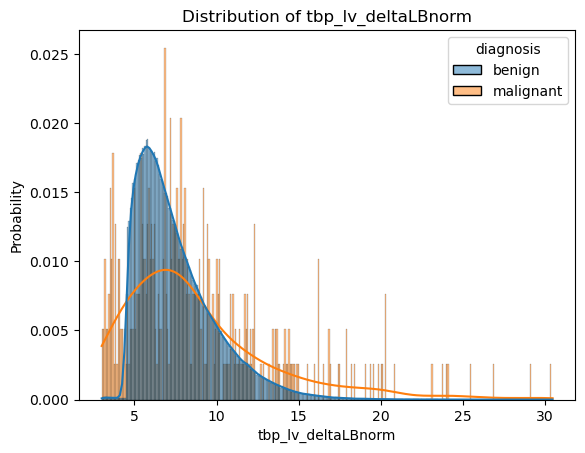

In [ ]:
plot_hist('tbp_lv_deltaLBnorm', False, True)

### Eccentricity

<Axes: title={'center': 'Distribution of tbp_lv_eccentricity'}, xlabel='tbp_lv_eccentricity', ylabel='Probability'>

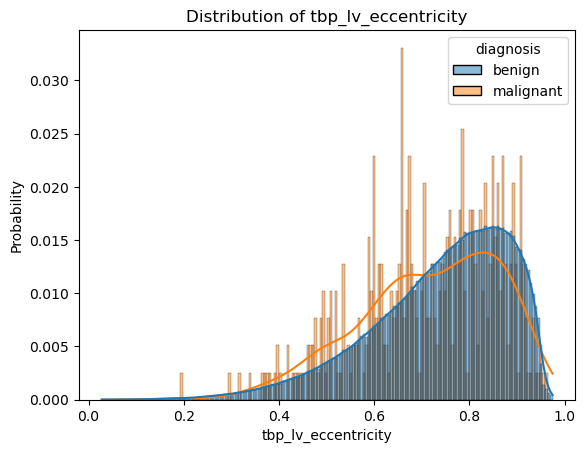

In [ ]:
plot_hist('tbp_lv_eccentricity', False, True)

### Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds

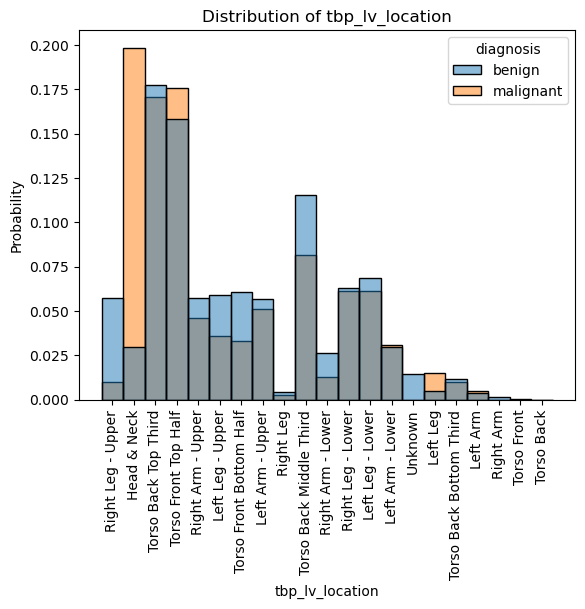

In [ ]:
ax = plot_hist('tbp_lv_location', True, False)
ticks = plt.xticks(rotation=90)

### Classification of anatomical location, simple

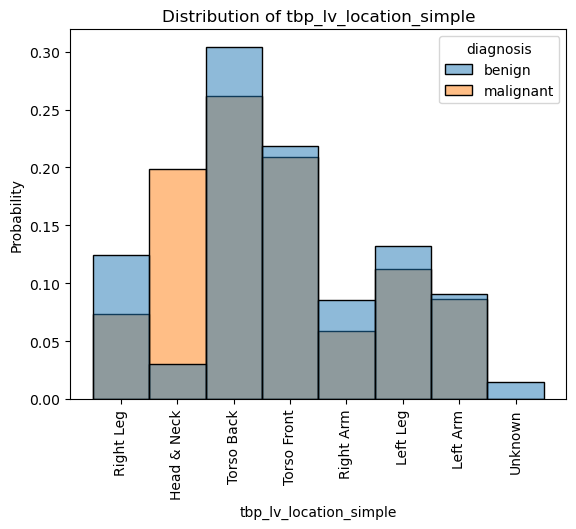

In [ ]:
ax = plot_hist('tbp_lv_location_simple', True, False)
ticks = plt.xticks(rotation=90)

### Smallest lesion diameter (mm)

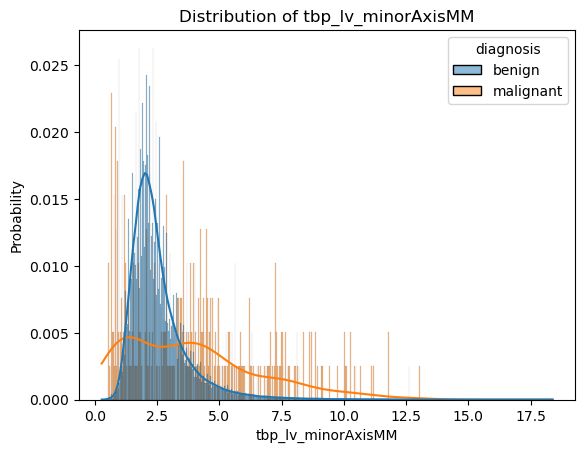

In [ ]:
ax = plot_hist('tbp_lv_minorAxisMM', False, True)

### Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist

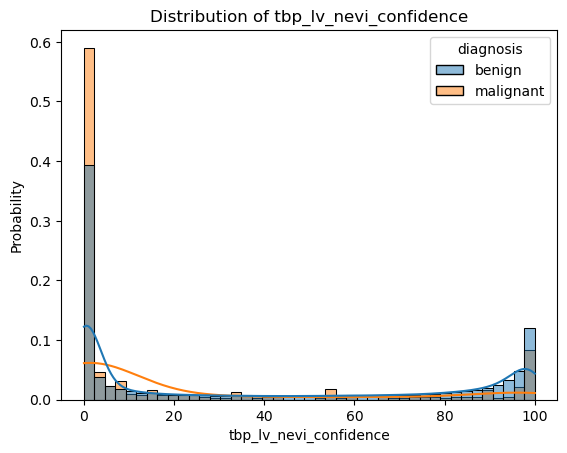

In [ ]:
ax = plot_hist('tbp_lv_nevi_confidence', False, True)

### Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.

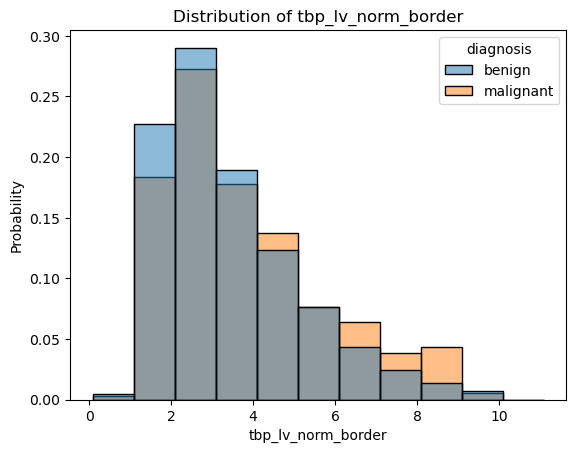

In [ ]:
ax = plot_hist('tbp_lv_norm_border', True, False)

### Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity

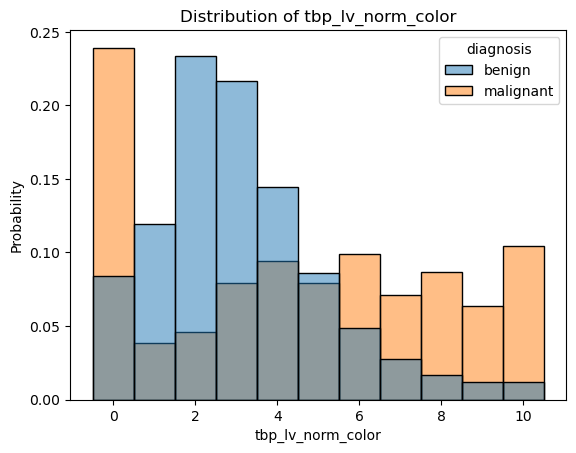

In [ ]:
ax = plot_hist('tbp_lv_norm_color', True, False)

### Perimeter of lesion (mm)

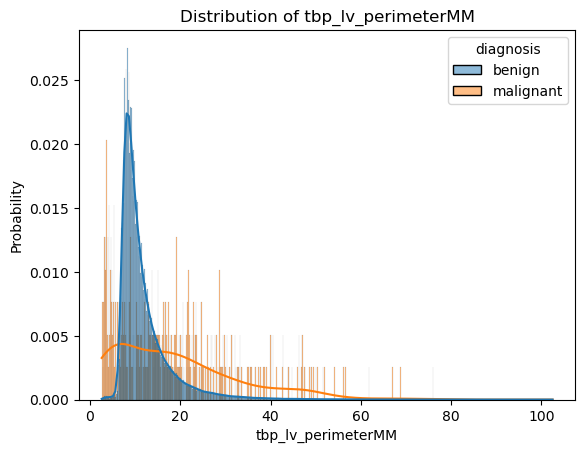

In [ ]:
ax = plot_hist('tbp_lv_perimeterMM', False, True)

### Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10

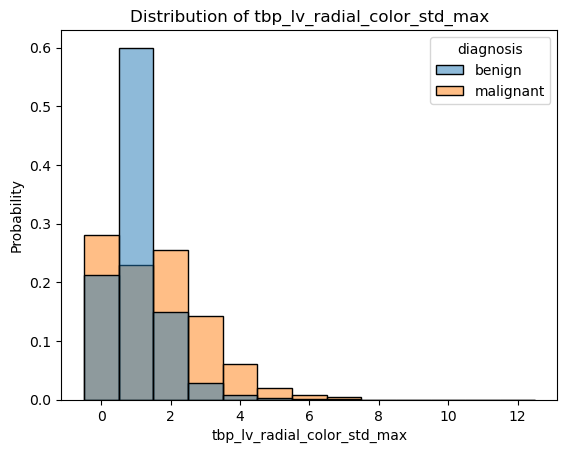

In [ ]:
ax = plot_hist('tbp_lv_radial_color_std_max', True, False)

### Standard deviation of L inside lesion

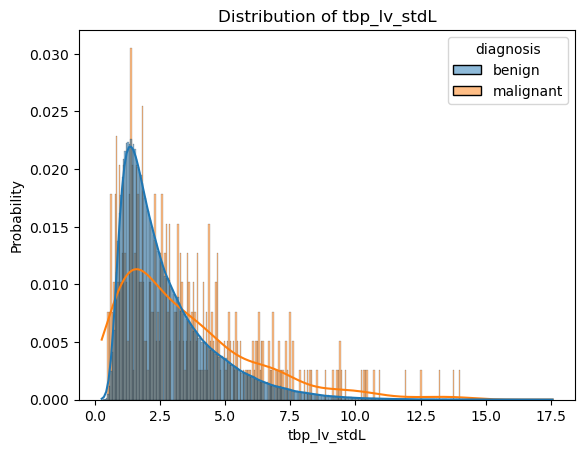

In [ ]:
ax = plot_hist('tbp_lv_stdL', False, True)

### Standard deviation of L outside lesion

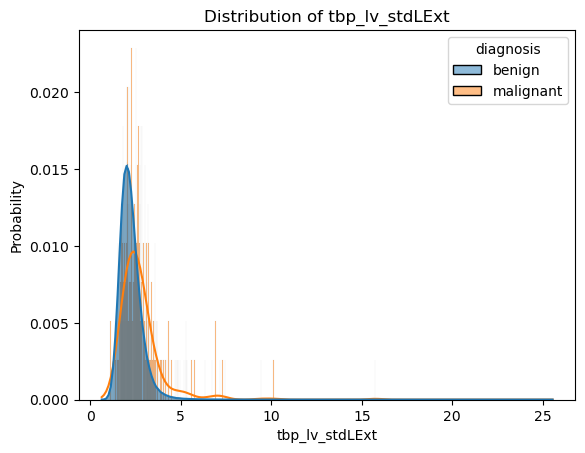

In [ ]:
ax = plot_hist('tbp_lv_stdLExt', False, True)

### Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10

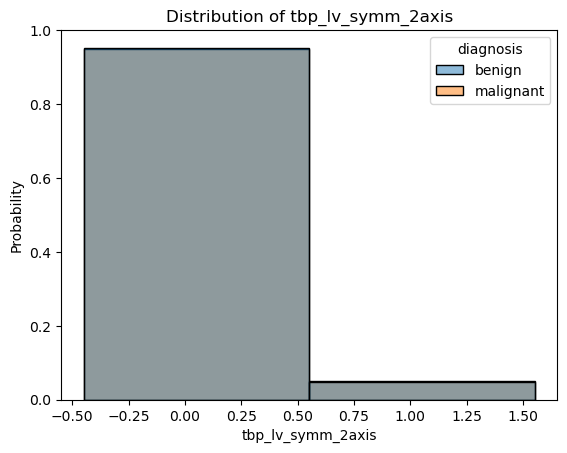

In [ ]:
ax = plot_hist('tbp_lv_symm_2axis', True, False)

### Lesion border asymmetry angle

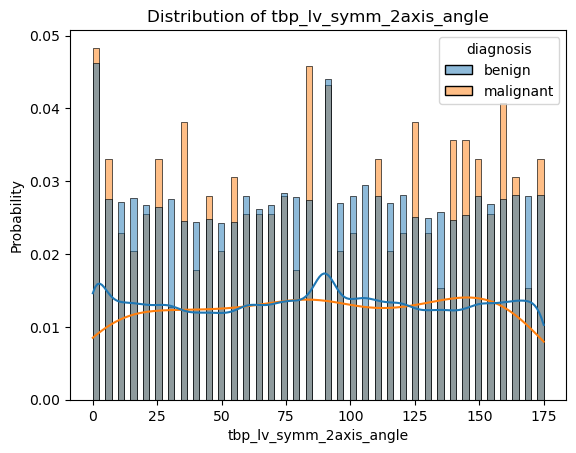

In [ ]:
ax = plot_hist('tbp_lv_symm_2axis_angle', False, True)

### X-coordinate of the lesion on 3D TBP

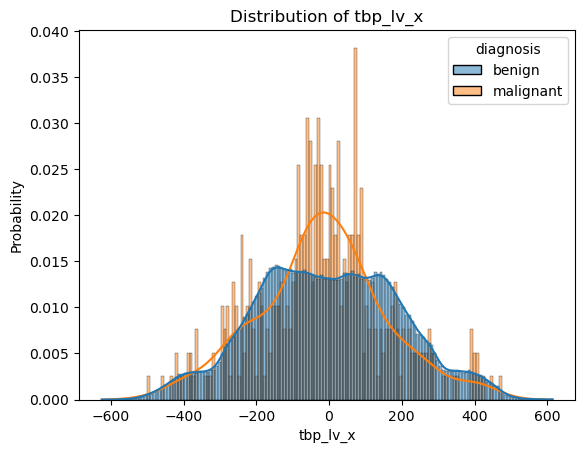

In [ ]:
ax = plot_hist('tbp_lv_x', False, True)

### Y-coordinate of the lesion on 3D TBP

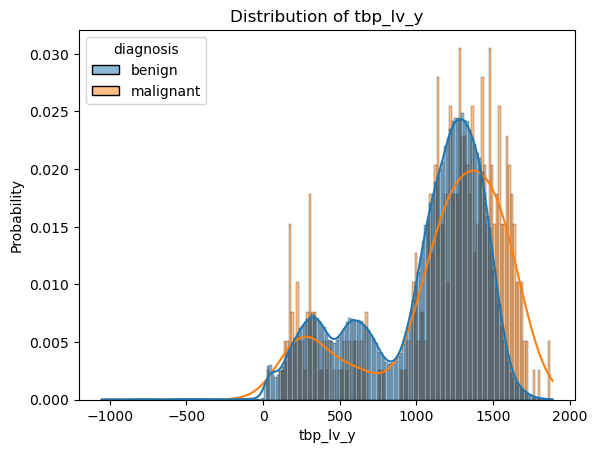

In [ ]:
ax = plot_hist('tbp_lv_y', False, True)

### Z-coordinate of the lesion on 3D TBP

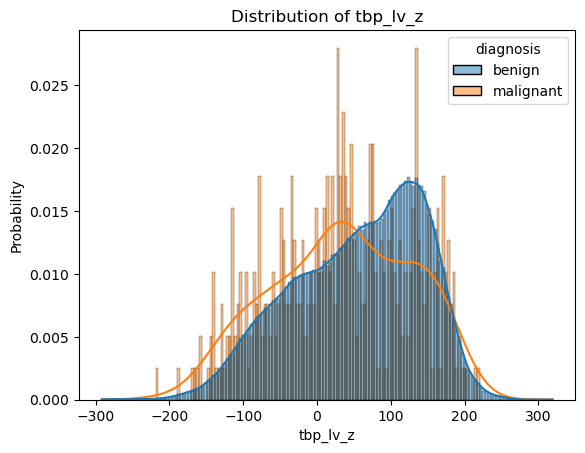

In [ ]:
ax = plot_hist('tbp_lv_z', False, True)